In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [2]:
u= []
L = 10 # comprimento da barra
Δx = .1 #L / num_pontos
Δt = 0.1
tempo_final = 100
num_pontos = int(np.ceil(tempo_final/Δt))
k = 0.835
λ = k * Δt/Δx**2
condição_inicial = 0.
contorno = np.array([100.,50.])
variavel = np.ones(num_pontos) * condição_inicial
xx = np.linspace(0,L,num_pontos)
tt = np.linspace(0,tempo_final,num_pontos)
matriz_coeficiente = CrankNicolson.gerarMatrizCoeficientes(num_pontos,λ)
matriz_ampliada = CrankNicolson.gerarMatrizAmpliada(num_pontos,contorno,variavel,λ)

In [3]:
matriz_coeficiente

array([[ 6.175 , -2.0875,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-2.0875,  6.175 , -2.0875, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -2.0875,  6.175 , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  6.175 , -2.0875,  0.    ],
       [ 0.    ,  0.    ,  0.    , ..., -2.0875,  6.175 , -2.0875],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , -2.0875,  6.175 ]])

In [4]:
for _ in np.arange(0,tempo_final,Δt):
    variavel = np.linalg.solve(matriz_coeficiente,matriz_ampliada)
    u.append(variavel)
    matriz_ampliada = CrankNicolson.gerarMatrizAmpliada(num_pontos,contorno,variavel,λ)

In [5]:
u = np.array(u)

In [6]:
u

array([[[77.85747227],
        [30.30892994],
        [11.79888336],
        ...,
        [ 5.89944168],
        [15.15446497],
        [38.92873613]],

       [[68.45026256],
        [53.29364419],
        [31.11981318],
        ...,
        [15.55990659],
        [26.64682209],
        [34.22513128]],

       [[80.33573728],
        [55.66563666],
        [40.2853163 ],
        ...,
        [20.14265815],
        [27.83281833],
        [40.16786864]],

       ...,

       [[98.76395736],
        [97.52821135],
        [96.2930584 ],
        ...,
        [48.1465292 ],
        [48.76410568],
        [49.38197868]],

       [[98.76457612],
        [97.52944842],
        [96.29491289],
        ...,
        [48.14745644],
        [48.76472421],
        [49.38228806]],

       [[98.76519395],
        [97.53068364],
        [96.2967646 ],
        ...,
        [48.1483823 ],
        [48.76534182],
        [49.38259697]]])

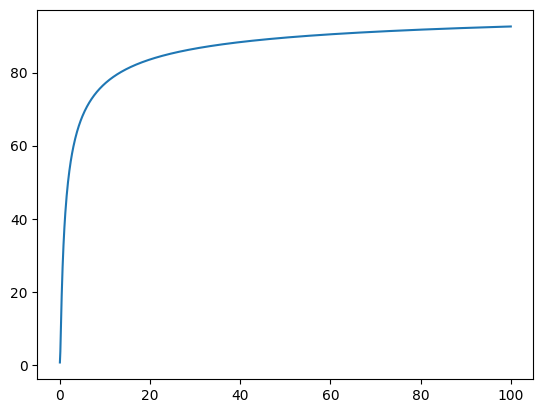

In [11]:
plt.plot(tt,u[:,5])